In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

players = pd.read_csv(io.BytesIO(uploaded[fn]))

Saving DSO578 Baseball Data - value vs salary_acquired (1).csv to DSO578 Baseball Data - value vs salary_acquired (1) (1).csv
User uploaded file "DSO578 Baseball Data - value vs salary_acquired (1) (1).csv" with length 6004 bytes


In [ ]:
players.head()

,Team,Name,bWAR,Salary,Acquired,Role
0,2023TEX,Marcus Semien,7.4,26000000,Free Agency,Hitter
1,2023TEX,Nathaniel Lowe,2.6,4050000,Traded,Hitter
2,2023TEX,Adolis Garcia,4.2,747760,Purchased,Hitter
3,2023TEX,Leody Taveras,2.6,733445,Amateur Free Agent,Hitter
4,2023TEX,Jonah Heim,2.9,745660,Traded,Hitter


In [ ]:
print(players['Acquired'].unique())

['Free Agency' 'Traded' 'Purchased' 'Amateur Free Agent' 'Amateur Draft'
 'Waivers']


In [ ]:
numerical_cols = players.select_dtypes(include=['number']).columns
acquired_df = players.groupby('Acquired')[numerical_cols].agg(['mean'])

In [ ]:
acquired_df

,bWAR,Salary
,mean,mean
Acquired,,
Amateur Draft,3.157895,4.252236e+06
Amateur Free Agent,2.618750,4.219715e+06
Free Agency,2.178947,1.160306e+07
Purchased,1.850000,1.348880e+06
Traded,1.617647,4.262446e+06
Waivers,0.250000,9.000000e+05


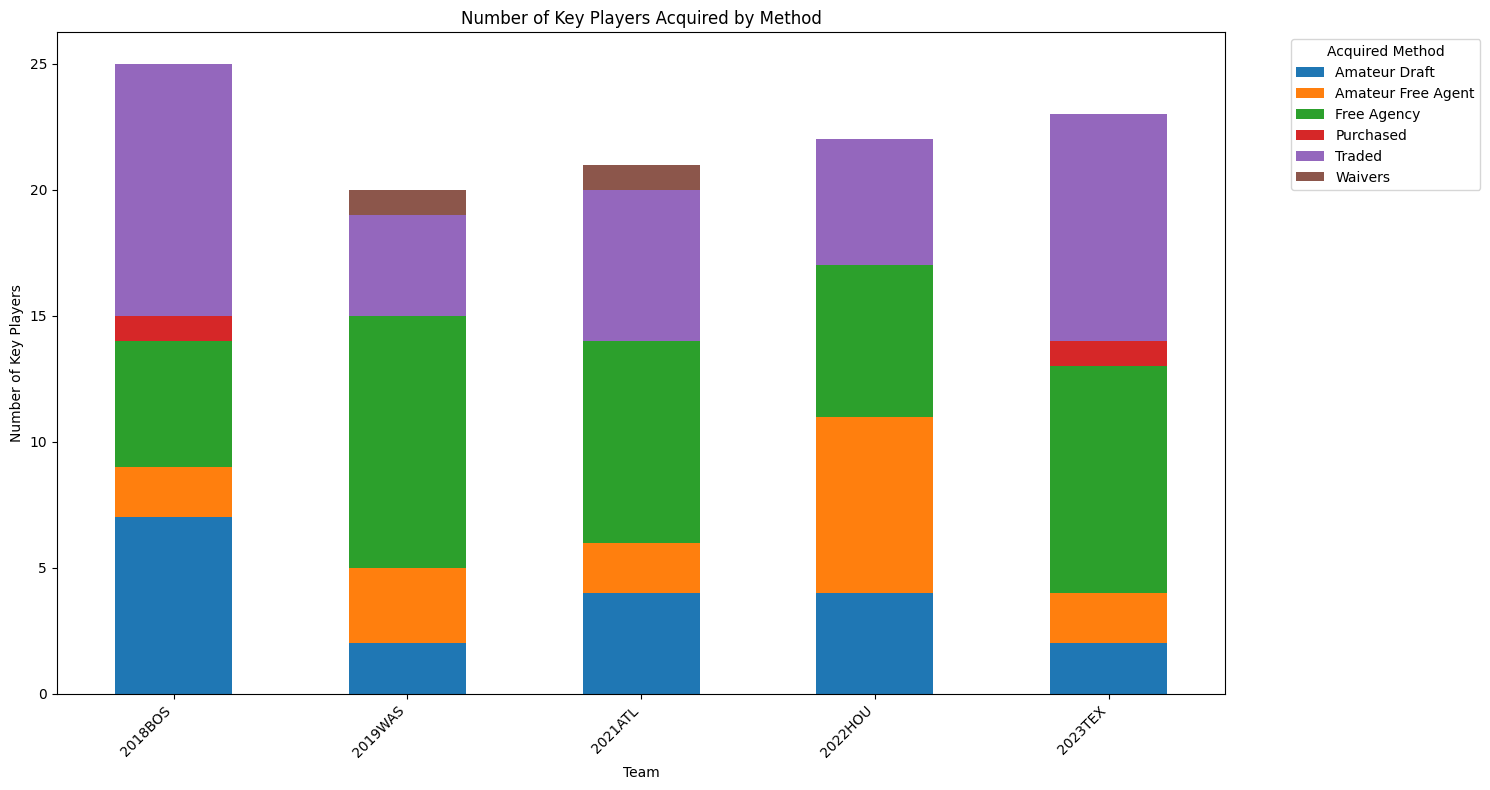

In [ ]:
team_acquired_counts = players.groupby(['Team', 'Acquired'])['Name'].count().unstack()
ax = team_acquired_counts.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.xlabel('Team')
plt.ylabel('Number of Key Players (>200PA or >50IP)')
plt.title('Number of Key Players Acquired by Method')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Acquired Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


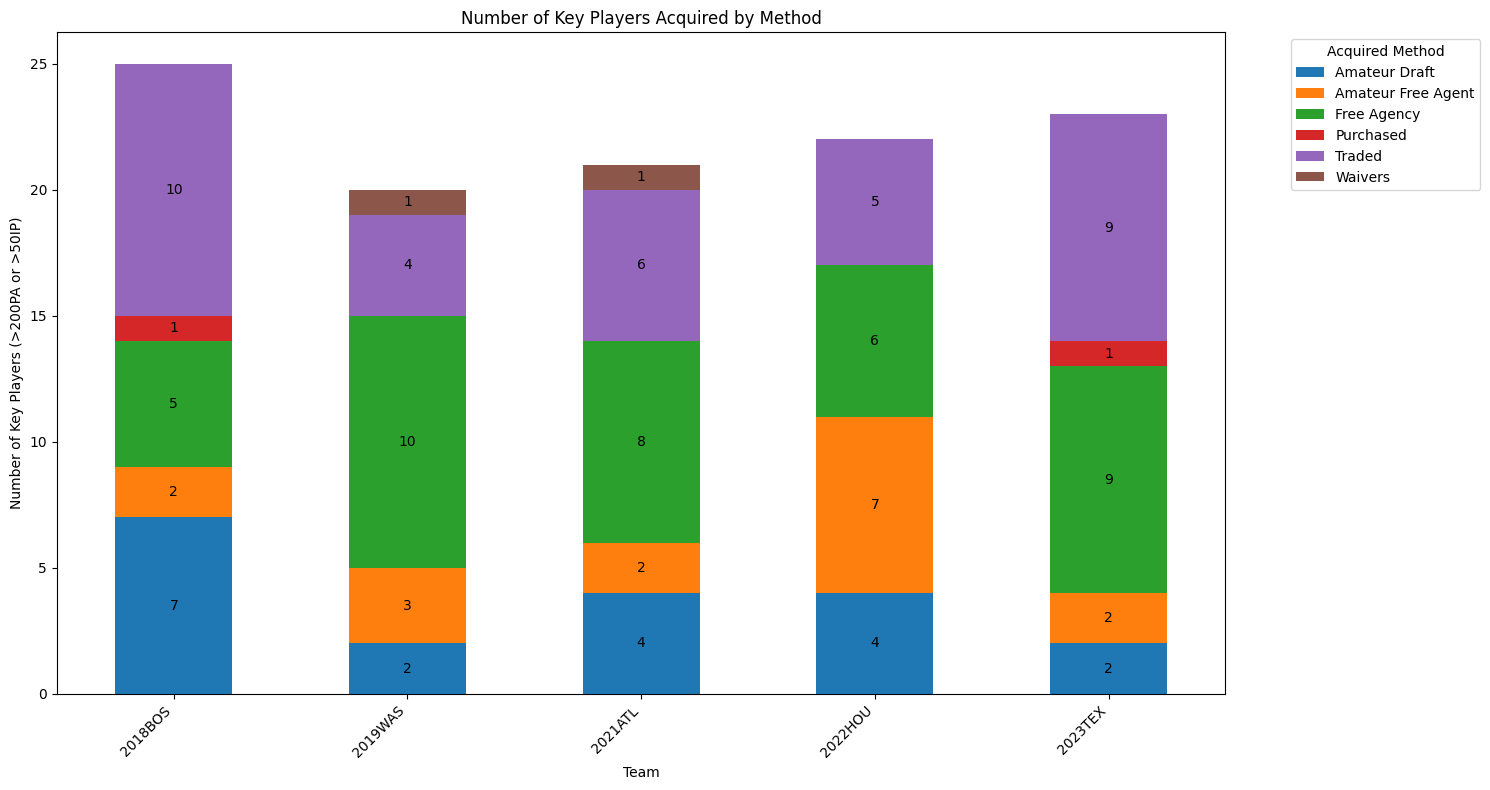

In [ ]:
team_acquired_counts = players.groupby(['Team', 'Acquired'])['Name'].count().unstack()

ax = team_acquired_counts.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.xlabel('Team')
plt.ylabel('Number of Key Players (>200PA or >50IP)')
plt.title('Number of Key Players Acquired by Method')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Acquired Method', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                '{:.0f}'.format(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.tight_layout()
plt.show()


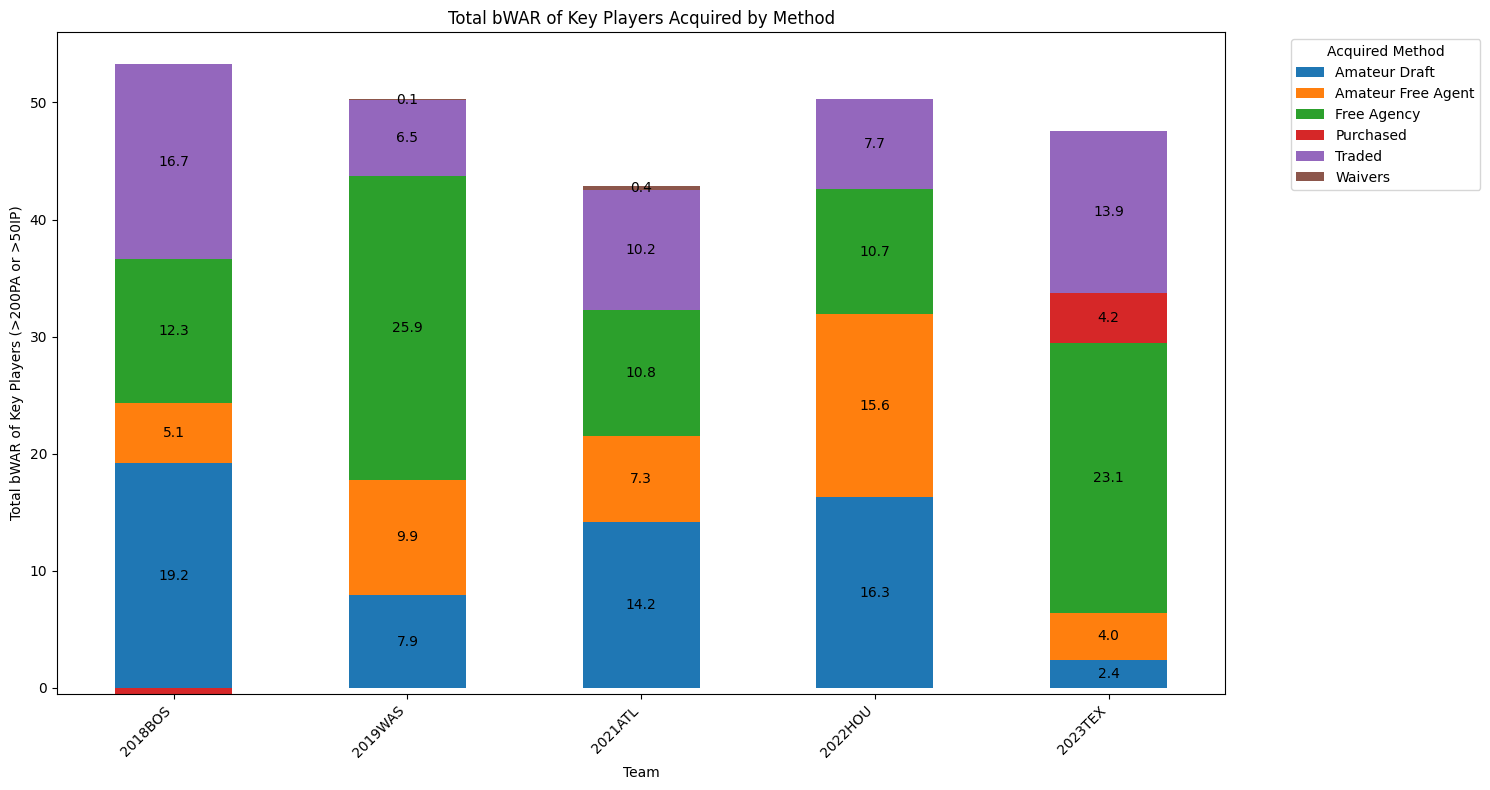

In [ ]:
team_acquired_bwar = players.groupby(['Team', 'Acquired'])['bWAR'].sum().unstack()

ax = team_acquired_bwar.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.xlabel('Team')
plt.ylabel('Total bWAR of Key Players (>200PA or >50IP)')
plt.title('Total bWAR of Key Players Acquired by Method')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Acquired Method', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                '{:.1f}'.format(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.tight_layout()
plt.show()


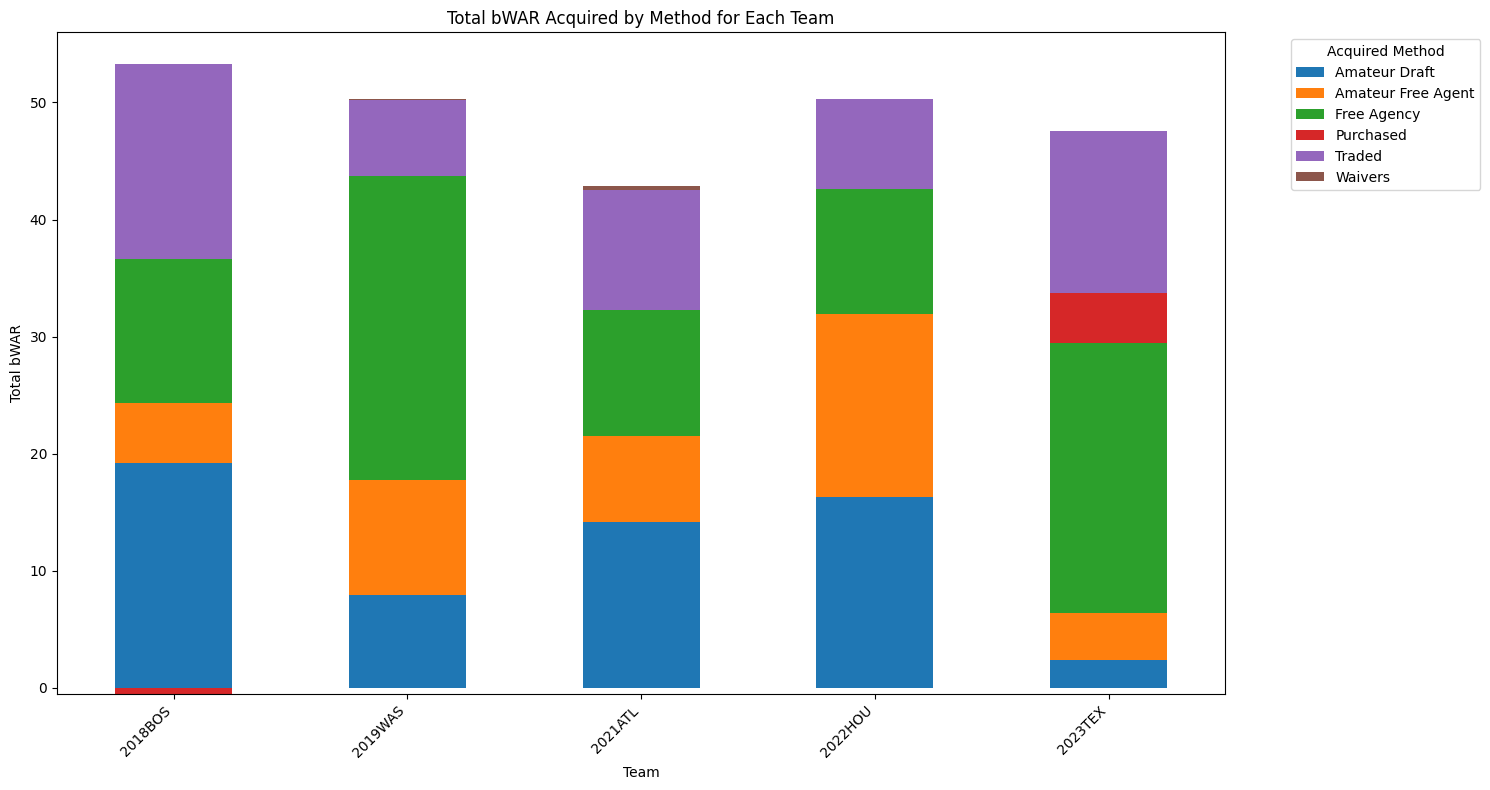

In [ ]:
team_acquired_bwar = players.groupby(['Team', 'Acquired'])['bWAR'].sum().unstack()

ax = team_acquired_bwar.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.xlabel('Team')
plt.ylabel('Total bWAR')
plt.title('Total bWAR Acquired by Method for Each Team')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Acquired Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:

team_acquired_bwar = players.groupby(['Team', 'Acquired'])['bWAR'].sum().unstack()
total_bwar_by_team = team_acquired_bwar.sum(axis=1)


homegrown_bwar_by_team = team_acquired_bwar[['Amateur Draft', 'Amateur Free Agent']].sum(axis=1)
percent_homegrown_bwar = (homegrown_bwar_by_team / total_bwar_by_team) * 100

# Print the results
print(percent_homegrown_bwar)


Team
2018BOS    46.022727
2019WAS    35.387674
2021ATL    50.116550
2022HOU    63.419483
2023TEX    13.445378
dtype: float64


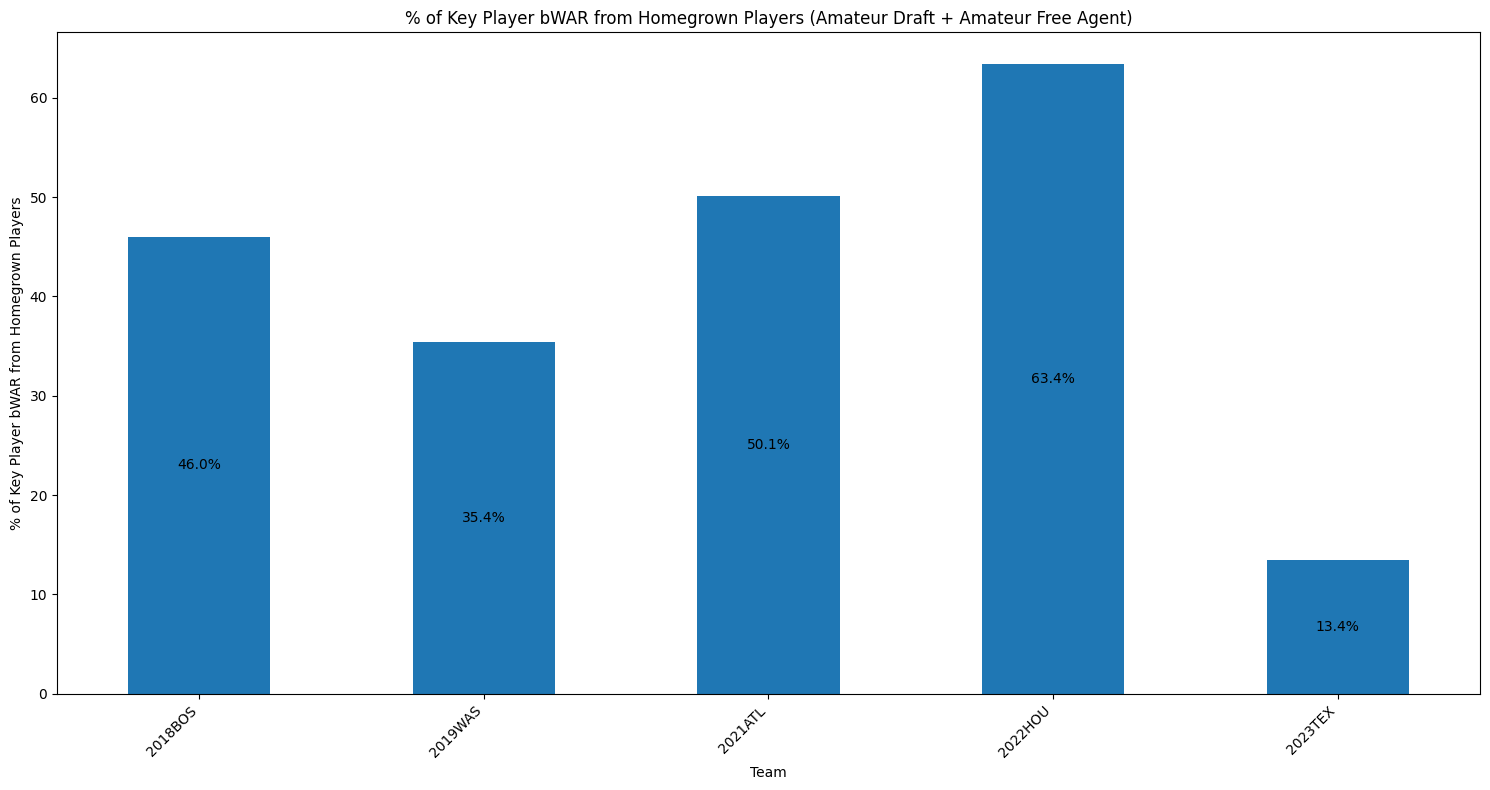

In [ ]:
ax = percent_homegrown_bwar.plot(kind='bar', figsize=(15, 8))

plt.xlabel('Team')
plt.ylabel('% of Key Player bWAR from Homegrown Players')
plt.title('% of Key Player bWAR from Homegrown Players (Amateur Draft + Amateur Free Agent)')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                '{:.1f}%'.format(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.tight_layout()
plt.show()


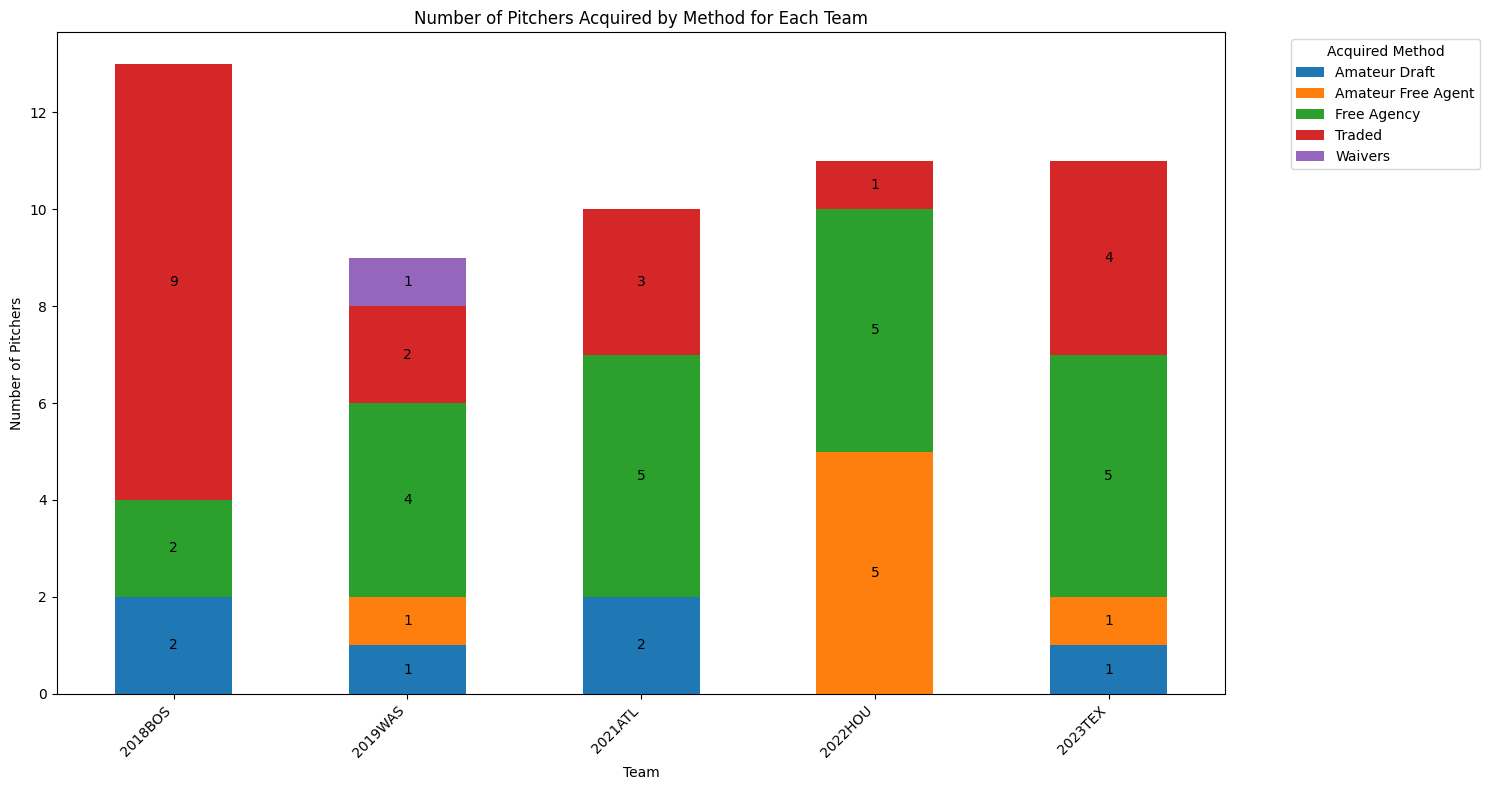

In [ ]:
pitcher_players = players[players['Role'] == 'Pitcher']

team_acquired_counts_pitchers = pitcher_players.groupby(['Team', 'Acquired'])['Name'].count().unstack()

ax = team_acquired_counts_pitchers.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.xlabel('Team')
plt.ylabel('Number of Pitchers')
plt.title('Number of Pitchers Acquired by Method for Each Team')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Acquired Method', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                '{:.0f}'.format(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.tight_layout()
plt.show()


<ipython-input-36-9a3542dd5e5b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x[i], y[i]))


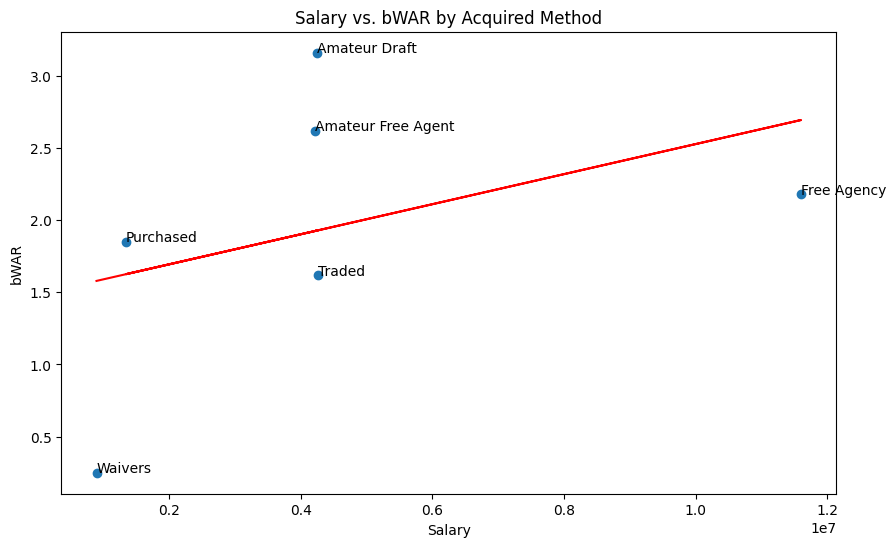

In [ ]:
x = acquired_df['Salary']['mean']
y = acquired_df['bWAR']['mean']

plt.figure(figsize=(10, 6))
plt.scatter(x, y)

for i, txt in enumerate(acquired_df.index):
    plt.annotate(txt, (x[i], y[i]))

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Salary')
plt.ylabel('bWAR')
plt.title('Salary vs. bWAR by Acquired Method')

plt.show()